<a href="https://colab.research.google.com/github/avish006/Churn-Data-Analysis/blob/main/Telco_Churn_EDA_FE_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
import numpy as np
import pandas as pd

In [292]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [293]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


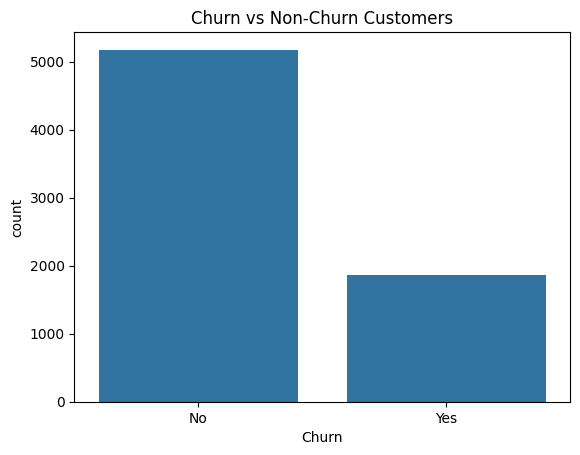

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn', data=df)
plt.title('Churn vs Non-Churn Customers')
plt.show()

In [295]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Rate: {churn_rate[1]:.2f}%")

Churn Rate: 26.54%


<ipython-input-295-22e266ea86e3>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Churn Rate: {churn_rate[1]:.2f}%")


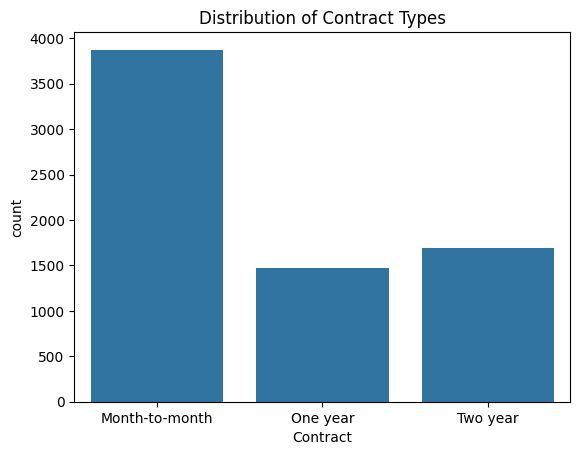

In [296]:
sns.countplot(x='Contract', data=df)
plt.title('Distribution of Contract Types')
plt.show()

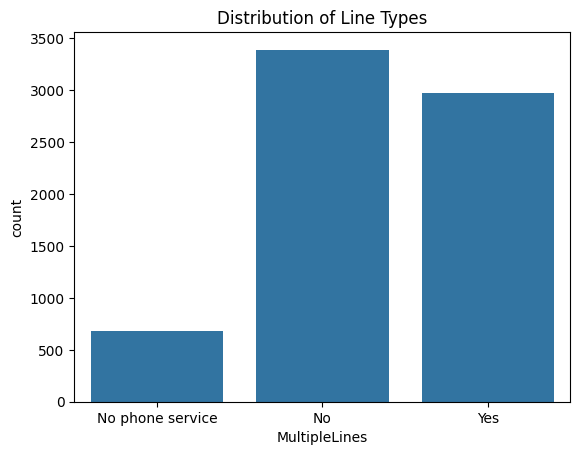

In [297]:
sns.countplot(x='MultipleLines', data=df)
plt.title('Distribution of Line Types')
plt.show()

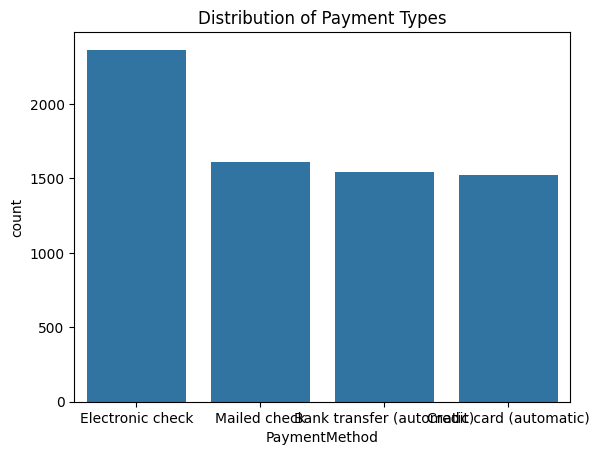

In [298]:
sns.countplot(x='PaymentMethod', data=df)
plt.title('Distribution of Payment Types')
plt.show()

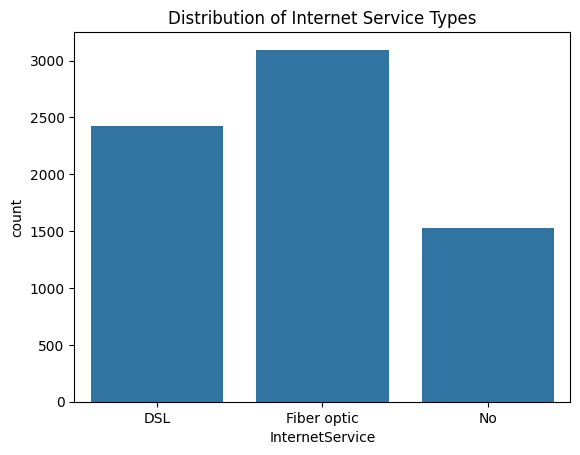

In [299]:
sns.countplot(x='InternetService', data=df)
plt.title('Distribution of Internet Service Types')
plt.show()

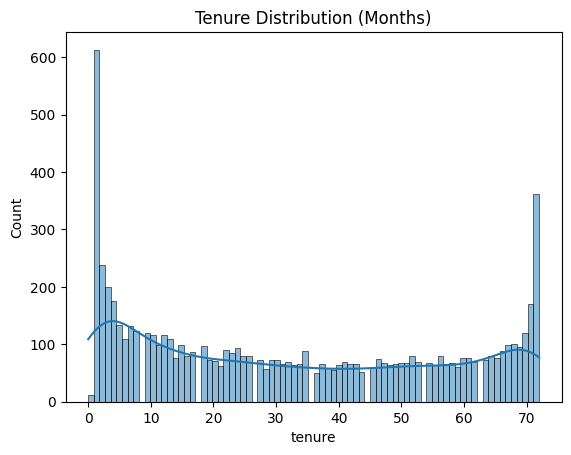

In [300]:
sns.histplot(df['tenure'], bins=80, kde=True)
plt.title('Tenure Distribution (Months)')
plt.show()

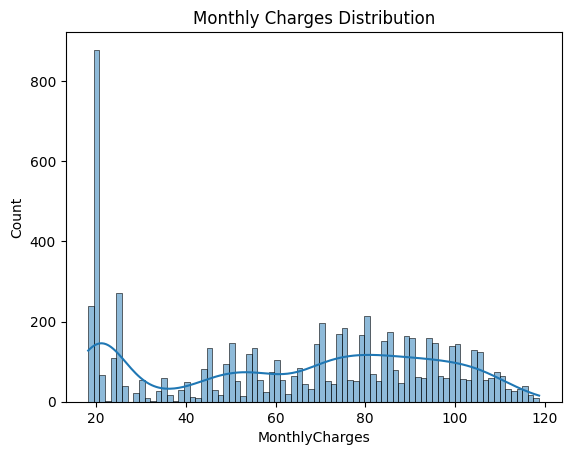

In [301]:
sns.histplot(df['MonthlyCharges'], bins=80, kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

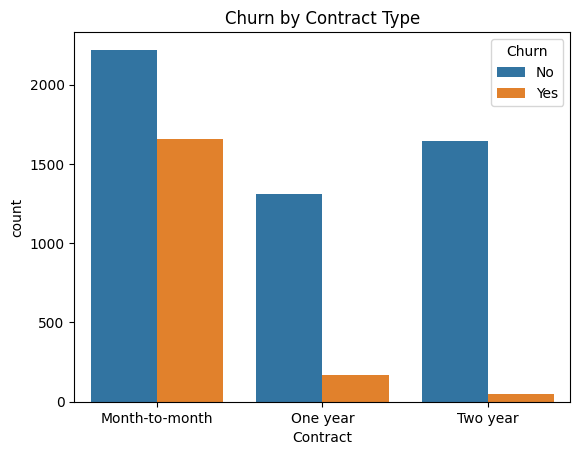

In [302]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

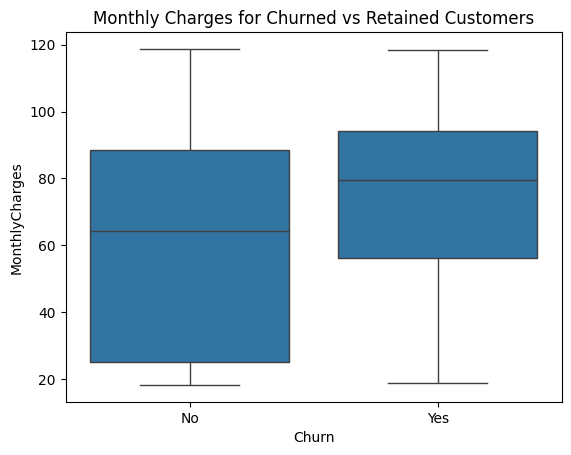

In [303]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges for Churned vs Retained Customers')
plt.show()

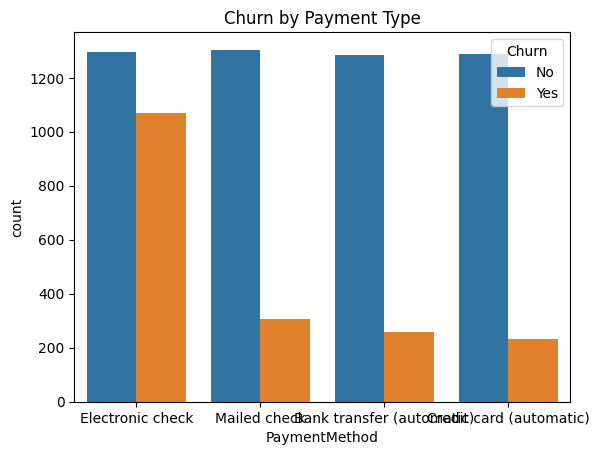

In [304]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Type')
plt.show()

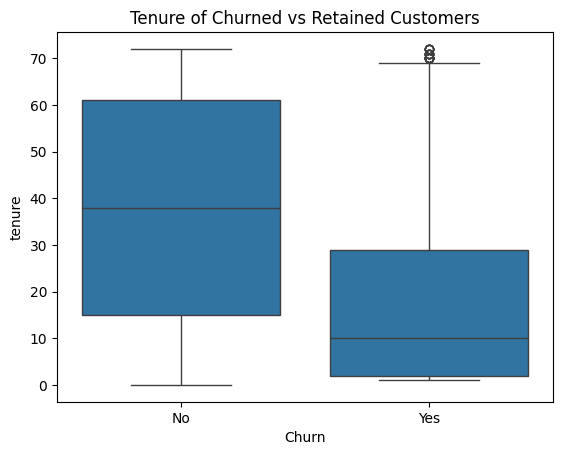

In [305]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure of Churned vs Retained Customers')
plt.show()

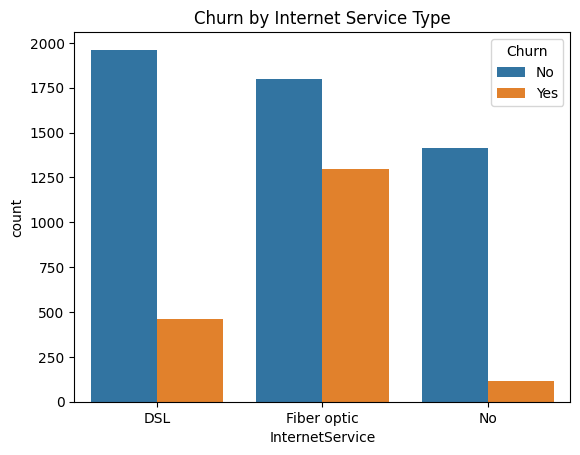

In [306]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.show()

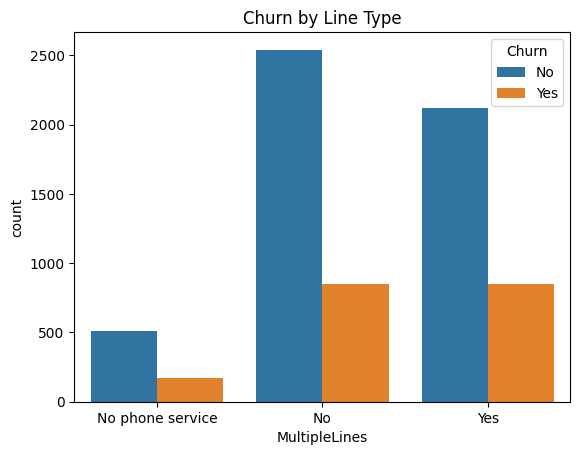

In [307]:
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('Churn by Line Type')
plt.show()

<Axes: xlabel='TenureGroup', ylabel='count'>

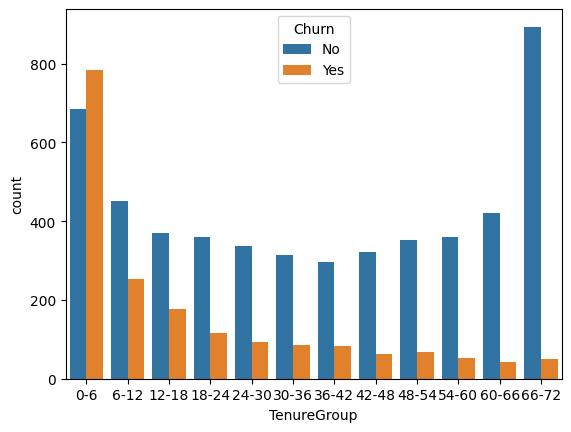

In [308]:
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 6,12 ,18,24, 30,36,42,48,54,60,66,72], labels=['0-6', '6-12', '12-18','18-24','24-30','30-36','36-42','42-48','48-54','54-60','60-66','66-72'])
sns.countplot(x='TenureGroup', hue='Churn', data=df)

In [309]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

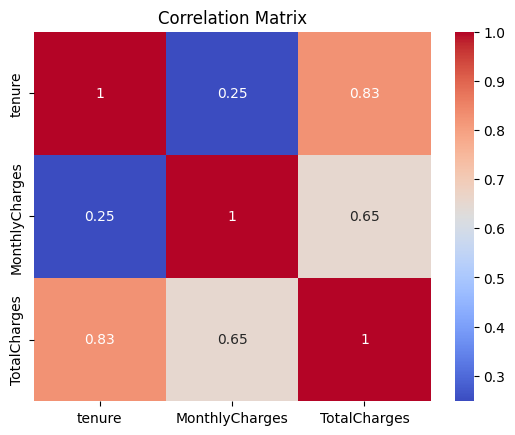

In [310]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

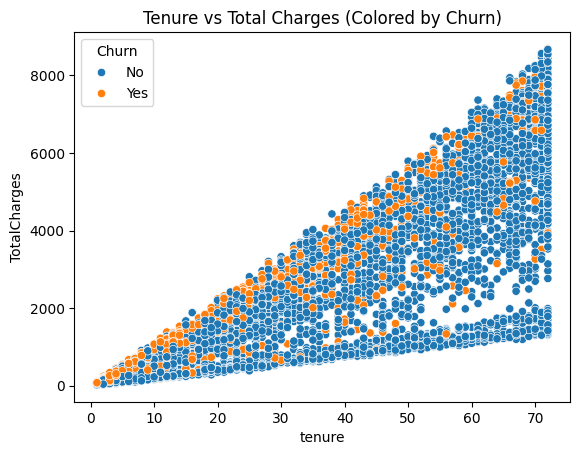

In [311]:
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)
plt.title('Tenure vs Total Charges (Colored by Churn)')
plt.show()

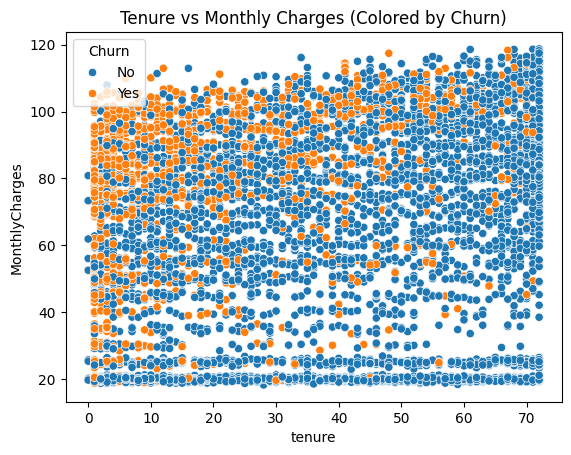

In [312]:
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Tenure vs Monthly Charges (Colored by Churn)')
plt.show()

In [313]:
df['TenureGroup'] = pd.to_numeric(df['TenureGroup'], errors='coerce')

In [314]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TenureGroup
count,7043.000000,7043.000000,7043.000000,7032.000000,0.0
mean,0.162147,32.371149,64.761692,2283.300441,NaN
std,0.368612,24.559481,30.090047,2266.771362,NaN
min,0.000000,0.000000,18.250000,18.800000,NaN
25%,0.000000,9.000000,35.500000,401.450000,NaN
50%,0.000000,29.000000,70.350000,1397.475000,NaN
75%,0.000000,55.000000,89.850000,3794.737500,NaN
max,1.000000,72.000000,118.750000,8684.800000,NaN


In [315]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
import joblib

In [316]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NaN


In [317]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)


In [318]:
df=df.drop(['customerID','gender','MultipleLines','PhoneService','StreamingTV','StreamingMovies','TenureGroup'],axis=1)
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [319]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [320]:
label_encoder = LabelEncoder()
df['Churn_Encoded'] = label_encoder.fit_transform(df['Churn'])

In [321]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'Churn':

        onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_data = onehot_encoder.fit_transform(df[[col]])
        encoded_cols = [f'{col}_{cat}' for cat in onehot_encoder.categories_[0]]
        encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)
        df = pd.concat([df, encoded_df], axis=1)
        df = df.drop(col, axis=1)

In [322]:
valid_indices = ~np.isnan(df['TotalCharges'])
f1 = df.iloc[valid_indices.to_numpy(), :].drop(['Churn', 'Churn_Encoded'], axis=1).values # Exclude target columns
t1 = df.iloc[valid_indices.to_numpy(), df.columns.get_loc('Churn_Encoded')].values

In [323]:
over = SMOTE(sampling_strategy=1)
f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({np.int64(0): 5174, np.int64(1): 5174})

In [324]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = StratifiedKFold(n_splits = 10)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    print("F1 Score: ",'{0:.2%}'.format(f1_score(y_test,prediction)))
    joblib.dump(classifier, 'xgb_model.pkl')


def model_evaluation(classifier,x_test,y_test):

    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    print(classification_report(y_test,classifier.predict(x_test)))

In [325]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

In [326]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

Cross Validation Score :  93.98%
ROC_AUC Score :  85.99%
F1 Score:  85.81%


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1040
           1       0.86      0.85      0.86      1030

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



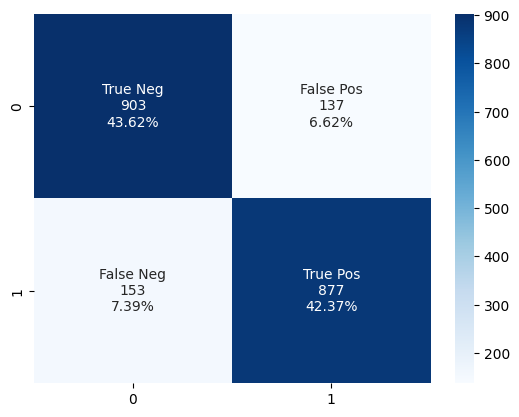

In [327]:
model_evaluation(classifier_xgb,x_test,y_test)